### Analysis on Forestia Audio Prediction Data

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 200)  # Show all rows
pd.set_option('display.width', 0)  # Adjust display width dynamically

In [2]:
path = 'forestia_mobile.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0', 'created_at'], axis=1)

df

,file_key,recording_date,pi_id,species_class,confidence_score,time_segment_id,device_type
0,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.951000,20250814_000830_5,1
1,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.954927,20250814_000830_10,1
2,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.834560,20250814_000830_15,1
3,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.921882,20250814_000830_20,1
4,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.864272,20250814_000830_25,1
...,...,...,...,...,...,...,...
99823,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.748363,20250819_211705_575,1
99824,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.416984,20250819_211705_580,1
99825,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.526669,20250819_211705_585,1
99826,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.344318,20250819_211705_590,1


In [3]:
unique_classes = df['species_class'].unique()
print(unique_classes)
print("### Total number of species classes :", len(unique_classes))

def extract_datetime(file_key, t_type):
    if 'secs' in file_key:
        time = file_key.split('_')[2].split('-')
        if t_type == 'hour':
            hour = time[0]
            return hour
        elif t_type == 'minute':
            minute = time[1]
            return minute
        else:
            raise ValueError("Incorrect t_type input!")
    else:
        time = file_key.split('_')[3]
        if t_type == 'hour':
            hour = time[:2]
            return hour
        elif t_type == 'minute':
            minute = time[2:4]
            return minute
        else:
            raise ValueError("Incorrect t_type input!")

['Plane' 'Dog' 'Human_noise' 'Halcyon-smyrnensis'
 'Chrysocolaptes-guttacristatus' 'Centropus-sinensis'
 'Eurystomus-orientalis' 'Blythipicus-pyrrhotis' 'Human_vocal'
 'Eudynamys-scolopaceus' 'Centropus-bengalensis' 'Harpactes-oreskios'
 'Noise' 'Hypothymis-azurea' 'Glaucidium-cuculoides'
 'Spilopelia-chinensis' 'Gallus-gallus' 'Anthus-hodgsoni'
 'Yungipicus-canicapillus' 'Dicrurus-leucophaeus' 'Dicrurus-remifer'
 'Cacomantis-merulinus' 'Abroscopus-superciliaris' 'Myiomela-leucura'
 'Culicicapa-ceylonensis' 'Cacomantis-sonneratii' 'Ixos-mcclellandii'
 'Alcedo-atthis' 'Phylloscopus-humei' 'Pericrocotus-speciosus' 'Siren'
 'Erpornis-zantholeuca' 'Hirundo-rustica' 'Phyllergates-cucullatus'
 'Surniculus-lugubris' 'Pycnonotus-aurigaster' 'Phylloscopus-inornatus'
 'Psilopogon-franklinii' 'Picumnus-innominatus' 'Cyornis-whitei'
 'Thunderstorm' 'Psilopogon-lineatus' 'Alophoixus-pallidus'
 'Sitta-frontalis' 'Parus-minor' 'Psilopogon-virens'
 'Phylloscopus-claudiae' 'Hypsipetes-leucocephalus'
 '

**Total number of predicted species+noise classes in Forestia: 75/90**

In [4]:
def extract_datetime(file_key, t_type):
    if 'secs' in file_key:
        time = file_key.split('_')[2].split('-')
        if t_type == 'hour':
            hour = time[0]
            return hour
        elif t_type == 'minute':
            minute = time[1]
            return minute
        else:
            raise ValueError("Incorrect t_type input!")
    else:
        time = file_key.split('_')[3]
        if t_type == 'hour':
            hour = time[:2]
            return hour
        elif t_type == 'minute':
            minute = time[2:4]
            return minute
        else:
            raise ValueError("Incorrect t_type input!")

In [5]:
print(df[df['device_type']==1]['file_key'].iloc[0])

Forestia_2025-08-14_20250814_000830.WAV


In [6]:
df['unique_date'] = df['pi_id']+'_'+ df['recording_date']
df['filename'] = df.loc[:, 'time_segment_id'].apply(lambda x: '_'.join(x.split('_')[:2]))
df['year'] = df.loc[:,'recording_date'].apply(lambda x: x.split('-')[0])
df['month'] = df.loc[:,'recording_date'].apply(lambda x: x.split('-')[1])
df['date'] = df.loc[:,'recording_date'].apply(lambda x: x.split('-')[2])
df['hour'] = df.loc[:,'file_key'].apply(lambda x: extract_datetime(x, 'hour'))
df['minute'] = df.loc[:, 'file_key'].apply(lambda x: extract_datetime(x, 'minute'))
df['ith_sec'] = df.loc[:, 'time_segment_id'].apply(lambda x: x.split('_')[-1])

df

,file_key,recording_date,pi_id,species_class,confidence_score,time_segment_id,device_type,unique_date,filename,year,month,date,hour,minute,ith_sec
0,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.951000,20250814_000830_5,1,Forestia_2025-08-14,20250814_000830,2025,08,14,00,08,5
1,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.954927,20250814_000830_10,1,Forestia_2025-08-14,20250814_000830,2025,08,14,00,08,10
2,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.834560,20250814_000830_15,1,Forestia_2025-08-14,20250814_000830,2025,08,14,00,08,15
3,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.921882,20250814_000830_20,1,Forestia_2025-08-14,20250814_000830,2025,08,14,00,08,20
4,Forestia_2025-08-14_20250814_000830.WAV,2025-08-14,Forestia,Plane,0.864272,20250814_000830_25,1,Forestia_2025-08-14,20250814_000830,2025,08,14,00,08,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99823,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.748363,20250819_211705_575,1,Forestia_2025-08-19,20250819_211705,2025,08,19,21,17,575
99824,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.416984,20250819_211705_580,1,Forestia_2025-08-19,20250819_211705,2025,08,19,21,17,580
99825,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.526669,20250819_211705_585,1,Forestia_2025-08-19,20250819_211705,2025,08,19,21,17,585
99826,Forestia_2025-08-19_20250819_211705.WAV,2025-08-19,Forestia,Plane,0.344318,20250819_211705_590,1,Forestia_2025-08-19,20250819_211705,2025,08,19,21,17,590


### Bird and Insect Species Count Appeared in the Audio Classification Result

In [7]:
per_species_count = df['species_class'].value_counts()
print(len(per_species_count))
per_species_count

75


species_class
Plane                            50447
Human_vocal                      13375
Noise                             8098
Human_noise                       5780
Culicicapa-ceylonensis            4749
Alcedo-atthis                     3840
Phylloscopus-humei                1254
Halcyon-smyrnensis                 963
Siren                              866
Gallus-gallus                      824
Phylloscopus-inornatus             765
Dicrurus-remifer                   621
Alophoixus-pallidus                606
Cacomantis-sonneratii              599
Cacomantis-merulinus               572
Dicrurus-leucophaeus               550
Mechanical                         514
Hypothymis-azurea                  440
Glaucidium-cuculoides              391
Train                              345
Centropus-sinensis                 325
Hirundo-rustica                    307
Upupa-epops                        298
Pericrocotus-speciosus             225
Urosphena-squameiceps              211
Sitta-front

**From August 14th to August 19th, 2025, audio data was collected from Forestia. For audio sound classification, this raw data was divided into 20-second chunks, resulting in 99,828 predictions. The most common predictions were, unsurprisingly, human sounds and background noises, followed by species such as Culicicapa ceylonensis and Alcedo atthis. It was noted that certain species had no or very few predictions in the area of Forestia where the data was collected.**

### Visualize Data Insight

/tmp/ipykernel_14641/3425334650.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ensures labels and title fit properly


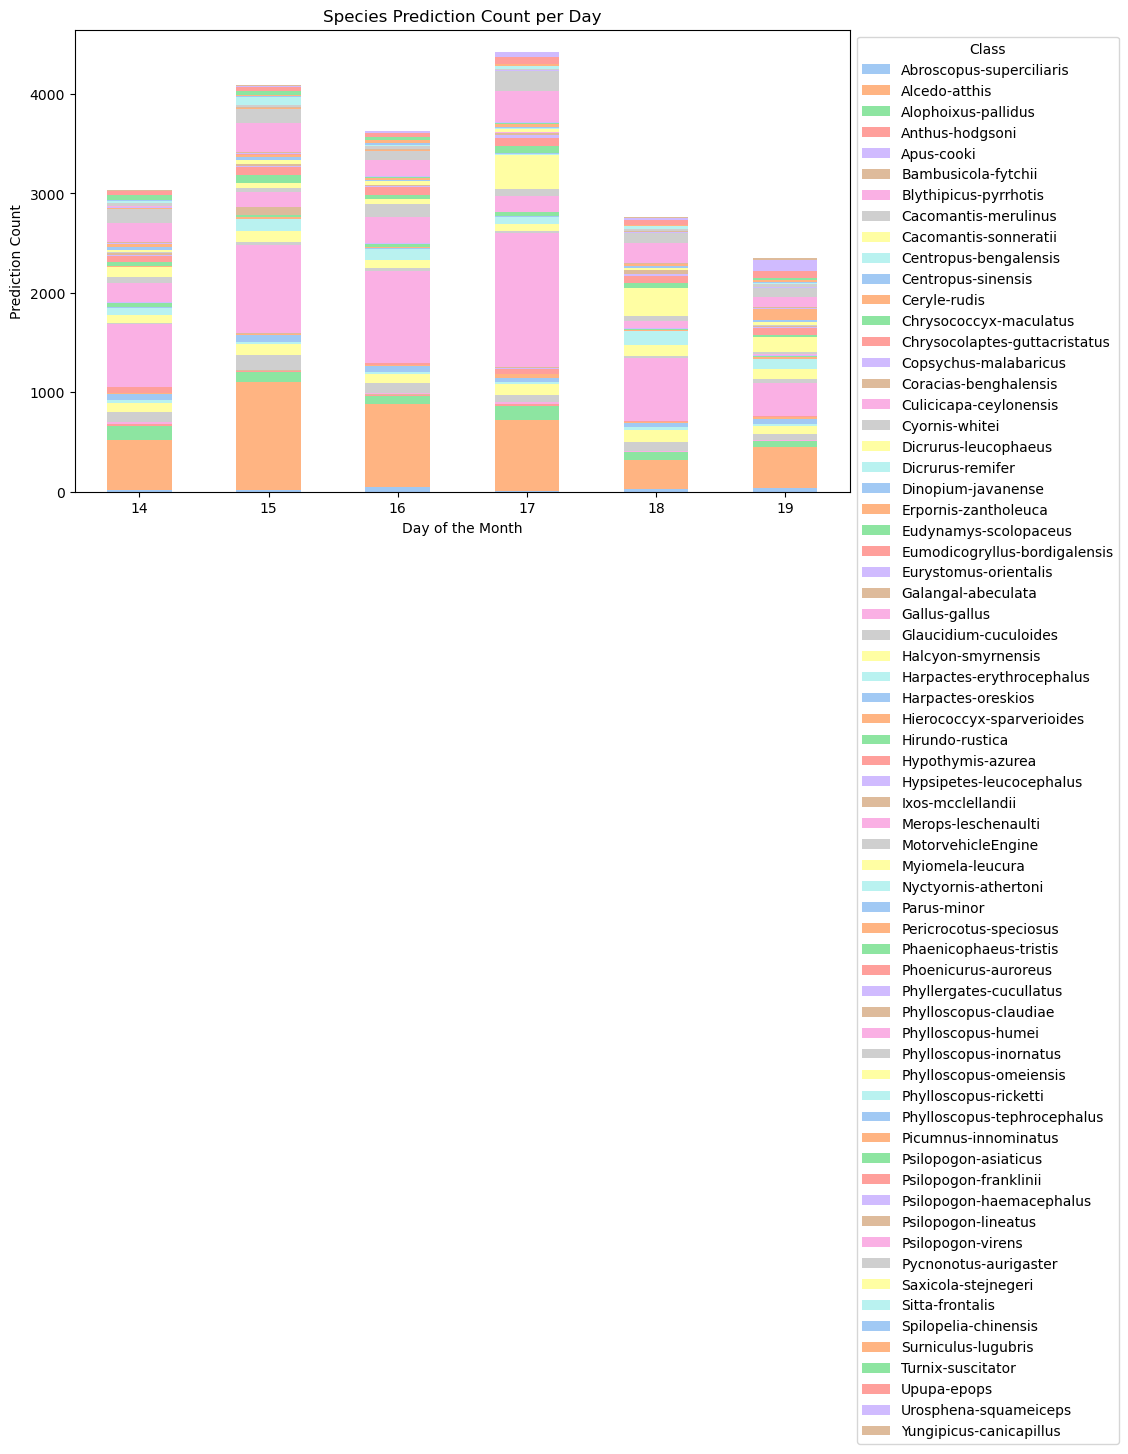

In [8]:
df_pred_day = df[df['month']=="08"].groupby(['date', 'species_class']).size().unstack(fill_value=0)
df_pred_day = df_pred_day.drop(['Plane', 'Human_vocal', 'Noise', 'Thunderstorm', 'Train', 'Siren', 'Dog', 'Mechanical', 'Human_noise'], axis=1)
# print(df_pred_day)
# Plot each class's count per hour (Ensure class_counts_per_hour is a DataFrame or Series with class counts)
df_pred_day.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('pastel', len(df_pred_day.columns)))

plt.xlabel("Day of the Month")
plt.ylabel("Prediction Count")
plt.title("Species Prediction Count per Day")
plt.legend(title="Class", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()  # Ensures labels and title fit properly
plt.show()

**A bar graph was used to show the daily count of bird and insect species, with each bar representing the total appearances of species and other noises. Over the six-day collection period, the average daily frequency of these appearances was approximately 3,500. The colored segments within each bar represent individual species. Specifically, the purple and orange segments, corresponding to Culicicapa ceylonensis and Alcedo atthis, made up the majority of species appearances each day.**

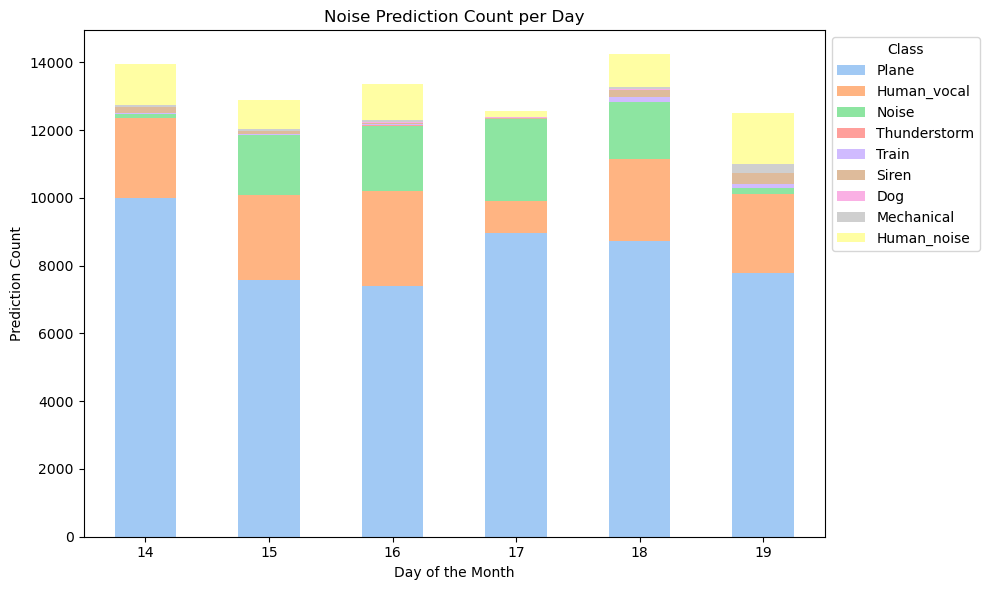

In [9]:
df_pred_day = df[df['month']=="08"].groupby(['date', 'species_class']).size().unstack(fill_value=0)
df_pred_day = df_pred_day[['Plane', 'Human_vocal', 'Noise', 'Thunderstorm', 'Train', 'Siren', 'Dog', 'Mechanical', 'Human_noise']]
# print(df_pred_day)
# Plot each class's count per hour (Ensure class_counts_per_hour is a DataFrame or Series with class counts)
df_pred_day.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('pastel', len(df_pred_day.columns)))

plt.xlabel("Day of the Month")
plt.ylabel("Prediction Count")
plt.title("Noise Prediction Count per Day")
plt.legend(title="Class", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()  # Ensures labels and title fit properly
plt.show()

**On the other hand, the average frequency of noise or "no-call" appearances was around 13,000, with Plane predictions being highly biased. This bias may be due to the closed box housing the collection device, which could have introduced audio noise. However, this finding still confirms the absence of insect or species appearances in those instances.**

/tmp/ipykernel_14641/3904618016.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ensures labels and title fit properly


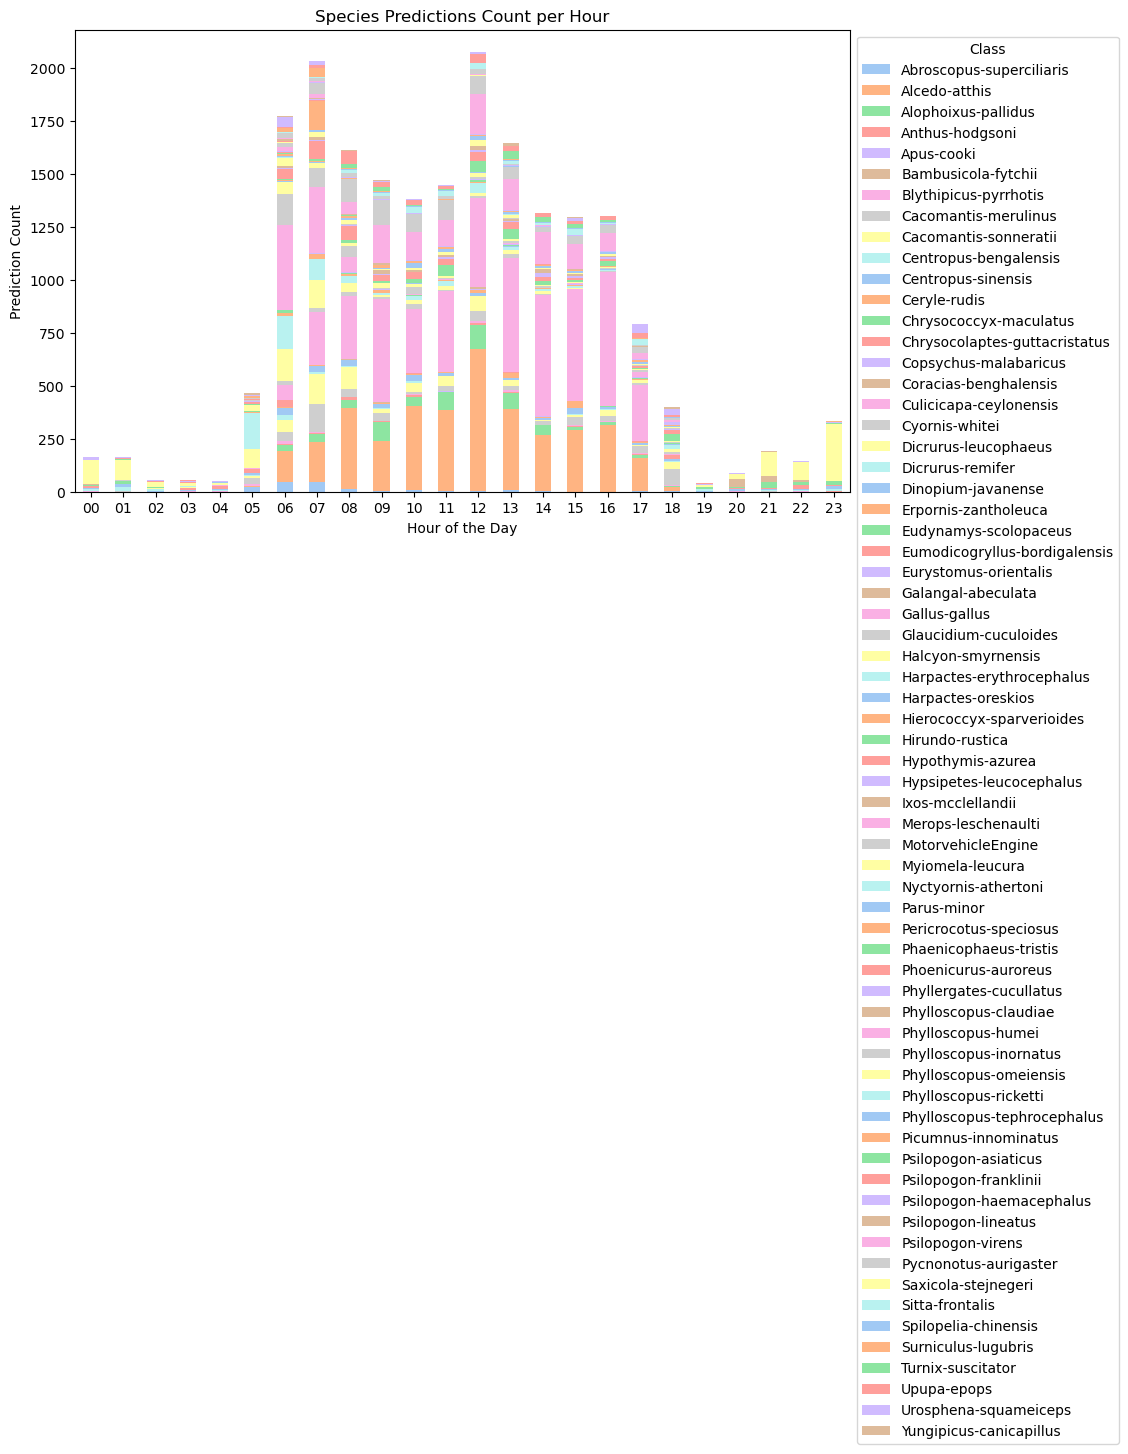

In [10]:
df_pred = df.groupby(['hour', 'species_class']).size().unstack(fill_value=0)
# df_pred = df_pred.drop('nocall', axis=1)
df_pred = df_pred.drop(['Plane', 'Human_vocal', 'Noise', 'Thunderstorm', 'Train', 'Siren', 'Dog', 'Mechanical', 'Human_noise'], axis=1)

# Plot each class's count per hour (Ensure class_counts_per_hour is a DataFrame or Series with class counts)
df_pred.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('pastel', len(df_pred.columns)))

plt.xlabel("Hour of the Day")
plt.ylabel("Prediction Count")
plt.title("Species Predictions Count per Hour")
plt.legend(title="Class", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()  # Ensures labels and title fit properly
plt.show()

**Based on the hourly stacked bar chart of species predictions, we can analyze on the key trends and patterns**  

*1. Overall Daily Activity Pattern 📈*  
The graph clearly shows that sound activity follows a strong bimodal pattern throughout the day. There is a prominent peak in predictions during the early morning hours, particularly from 06:00 to 08:00, and another smaller peak in the late afternoon, from around 15:00 to 17:00. Conversely, activity drops significantly during the late night and early morning hours (00:00 to 05:00) and also shows a notable dip during the midday period (11:00 to 14:00). This pattern is typical for many diurnal species that are most vocal at dawn and dusk.  

*2. Dominant Species and Noise 🦜*  
The most significant contributors to the overall prediction count are the species *Culicicapa ceylonensis* (pink segment) and *Alcedo atthis* (orange segment).  
*Culicicapa ceylonensis* shows a consistently high presence throughout the day, especially dominating the morning and afternoon peaks. This suggests it's a very common and active species in the collected area.  
Alcedo atthis also has a substantial presence, with its orange segment making up a significant portion of the bars, particularly during the middle of the day. This is consistent with its behavior as a fishing bird that is active during daylight hours.

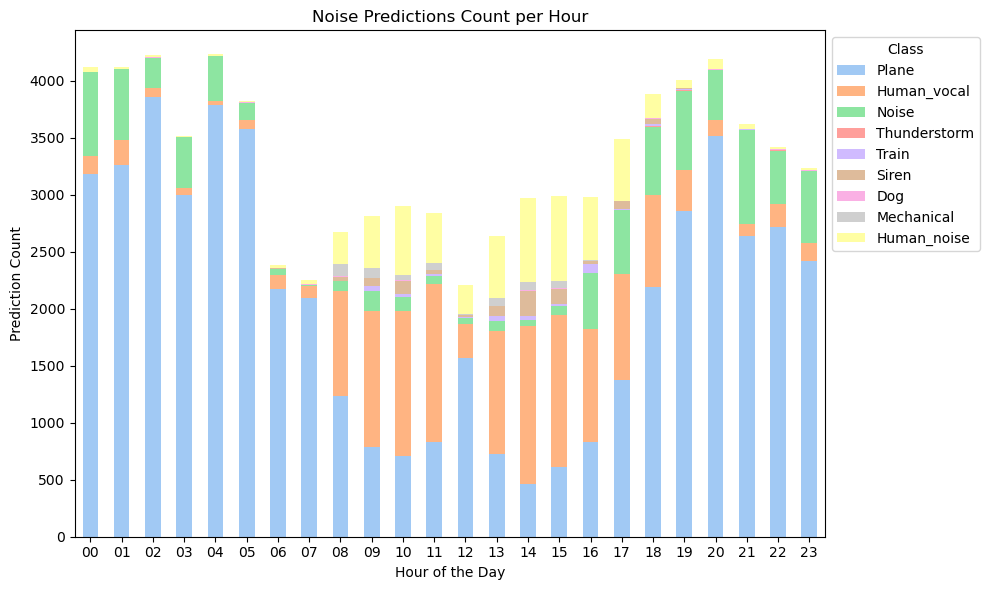

In [11]:
df_pred = df.groupby(['hour', 'species_class']).size().unstack(fill_value=0)
# df_pred = df_pred.drop('nocall', axis=1)
df_pred = df_pred[['Plane', 'Human_vocal', 'Noise', 'Thunderstorm', 'Train', 'Siren', 'Dog', 'Mechanical', 'Human_noise']]

# Plot each class's count per hour (Ensure class_counts_per_hour is a DataFrame or Series with class counts)
df_pred.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('pastel', len(df_pred.columns)))

plt.xlabel("Hour of the Day")
plt.ylabel("Prediction Count")
plt.title("Noise Predictions Count per Hour")
plt.legend(title="Class", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()  # Ensures labels and title fit properly
plt.show()

**Based on the hourly stacked bar chart of noise predictions**  
The sheer volume of Plane predictions (light blue) in the noise graph, particularly during times of low biological activity, highlights a significant bias in the dataset. The daily average count for noise and "no-call" is indeed high, as you previously noted, largely due to this single class.

**Contrasting Species and Noise Pattern**  
The peaks in species predictions and noise predictions do not consistently overlap. The species are most vocal at dawn and dusk, while the noise, particularly from planes, seems to follow a separate, possibly human-driven, schedule, with significant activity even late at night and in the early morning. This suggests the plane noise is an independent variable affecting the overall audio environment, rather than being a result of local wildlife activity.

### Forestia Biodiversity Score Prediction

In [12]:
!python3 predict.py

Model loaded successfully.
Device Area: Forestia
  Class A: 26, Votes: 18.31%
  Class B: 42, Votes: 29.58%
  Class C: 74, Votes: 52.11%
------------------------------
########## Final Prediction ##########
Biodiversity Score Level:  B
##########


**Scoring Threshold**

The output of the biodiversity score prediction for each row is aggregated by the count of each class prediction and then converted into a percentage contribution. Due to data imbalance in the training distribution, Class C is the majority prediction in almost all cases. To address this issue, we set the following sequential criteria:

If the majority vote contribution for Class B is >13%, the area is assigned Class B.

If the first criterion is not met and the majority vote contribution for Class A is >6%, the area is assigned Class A.

If the first two criteria are not met, the area is assigned Class C.

**Final Score Prediction**

Based on the above criteria, the final biodiversity level prediction score is Class B.